**KNN Algoritması**

* Bir veri tahmin edilecegi zaman en yakın k tane komsusuna bakılır cogunluga göre karar verilir
*   eşitlik olmaması için k degeri genelde tek seçilir
*   classification algoritmasıdır


*   kaggledan alınan breast cancer veri seti kullanıldı







In [18]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv("data.csv")
data.head()
# M kotu huylu kanser hucresi B iyi huylu

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data.drop(["id","Unnamed: 32"],axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

In [13]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 567
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       212 non-null    int64  
 1   diagnosis                212 non-null    object 
 2   radius_mean              212 non-null    float64
 3   texture_mean             212 non-null    float64
 4   perimeter_mean           212 non-null    float64
 5   area_mean                212 non-null    float64
 6   smoothness_mean          212 non-null    float64
 7   compactness_mean         212 non-null    float64
 8   concavity_mean           212 non-null    float64
 9   concave points_mean      212 non-null    float64
 10  symmetry_mean            212 non-null    float64
 11  fractal_dimension_mean   212 non-null    float64
 12  radius_se                212 non-null    float64
 13  texture_se               212 non-null    float64
 14  perimeter_se             212 no

In [14]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 19 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       357 non-null    int64  
 1   diagnosis                357 non-null    object 
 2   radius_mean              357 non-null    float64
 3   texture_mean             357 non-null    float64
 4   perimeter_mean           357 non-null    float64
 5   area_mean                357 non-null    float64
 6   smoothness_mean          357 non-null    float64
 7   compactness_mean         357 non-null    float64
 8   concavity_mean           357 non-null    float64
 9   concave points_mean      357 non-null    float64
 10  symmetry_mean            357 non-null    float64
 11  fractal_dimension_mean   357 non-null    float64
 12  radius_se                357 non-null    float64
 13  texture_se               357 non-null    float64
 14  perimeter_se             357 n

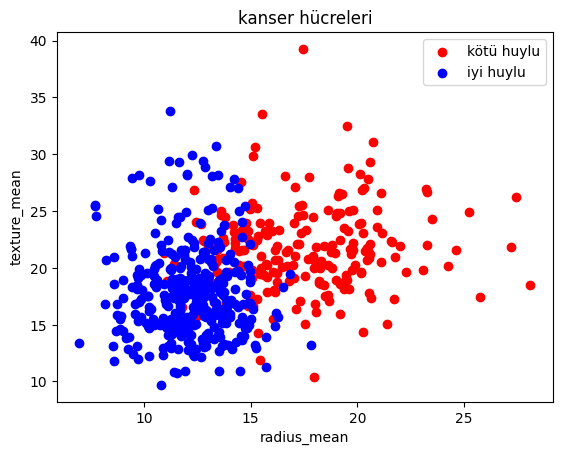

In [19]:
#ort yarıçapı ve dokusuna göre iyi  ve kotu huylu hucreleri görselleştirme
plt.title("kanser hücreleri")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kötü huylu")
plt.scatter(B.radius_mean,B.texture_mean,color="blue",label="iyi huylu")
plt.legend()
plt.show()

In [20]:
data.diagnosis

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [21]:
#katogorik degeri 0-1 dönüştürmeliyiz
data.diagnosis=[1 if x=="M" else 0 for x in data.diagnosis]
data.diagnosis

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [23]:
data1=data.drop(["id","Unnamed: 32","diagnosis"],axis=1)
data1.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1,data.diagnosis,test_size=0.33,random_state=0)

In [25]:
print(x_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
56        19.210         18.57          125.50     1152.0          0.10530   
144       10.750         14.97           68.26      355.3          0.07793   
60        10.170         14.88           64.55      311.9          0.11340   
6         18.250         19.98          119.60     1040.0          0.09463   
8         13.000         21.82           87.50      519.8          0.12730   
..           ...           ...             ...        ...              ...   
277       18.810         19.98          120.90     1102.0          0.08923   
9         12.460         24.04           83.97      475.9          0.11860   
359        9.436         18.32           59.82      278.6          0.10090   
192        9.720         18.22           60.73      288.1          0.06950   
559       11.510         23.93           74.52      403.5          0.09261   

     compactness_mean  concavity_mean  concave points_mean  sym

In [26]:
print(y_test)

512    1
457    0
439    0
298    0
37     0
      ..
100    1
336    0
299    0
347    0
502    0
Name: diagnosis, Length: 188, dtype: int64


In [35]:
#model oluşturma
#k degeri 3 iken 0.93 5 iken 0.94
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
tahminet=knn.predict(x_test)

In [36]:
knn.score(x_test,y_test)

0.9468085106382979

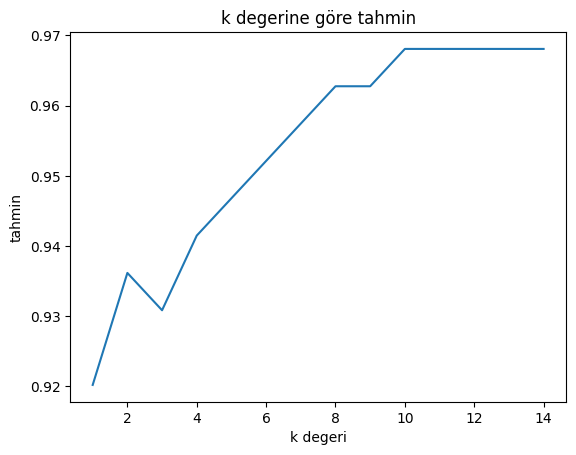

In [39]:
#hangi k degerinde en iyi sonucları alır?
tahmin_list=[]
for k in range(1,15):
   knn1=KNeighborsClassifier(n_neighbors= k)
   knn1.fit(x_train,y_train)
   tahmin_list.append(knn1.score(x_test,y_test))
plt.title("k degerine göre tahmin")
plt.plot(range(1,15),tahmin_list)
plt.xlabel("k degeri")
plt.ylabel("tahmin")
plt.show()